Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
# Считаем, сколько процентов спасено всего женщин и мужчин.  
surv = titanic.loc[titanic.survived == 1].groupby('sex').count()
surv['survived']

sex
female    233
male      109
Name: survived, dtype: int64

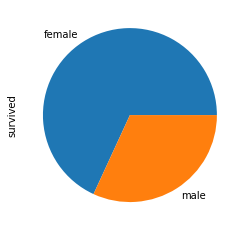

In [92]:
surv['survived'].plot(kind = 'pie')

Хотим проанализировать количество спасенных по гендерному признаку.  Здесь подходит pie chart. Хорошо видно, что женщин спаслось существенно больше, чем мужчин.  Это говорит о том, что в массе своей мужчины на Титанике были похожи на Леонардо ДиКаприо. 

In [94]:
# Посчитаем, сколько в процентном отношении спаслось женщин и мужчин в зависимости от класса билета

In [96]:
surv_by_class = titanic.groupby(['sex','class'])['survived'].agg('mean').unstack()
surv_by_class

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


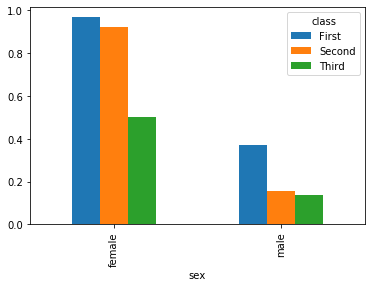

In [97]:
surv_by_class.plot(kind = 'bar')

Класс имеет значение...  На этой диаграмме наглядно видно,  что больше всего в процентном отношении спаслось пасажиров первого класса, меньше - третьего. 

In [ ]:
# Сделаем то же самое в зависимости от классов на накопительной диаграмме. 

In [178]:
surv_by_class = titanic.groupby(['class', 'sex'])['survived'].agg('mean').unstack()
surv_by_class = surv_by_class.reset_index()
surv_by_class

sex,class,female,male
0,First,0.968085,0.368852
1,Second,0.921053,0.157407
2,Third,0.500000,0.135447


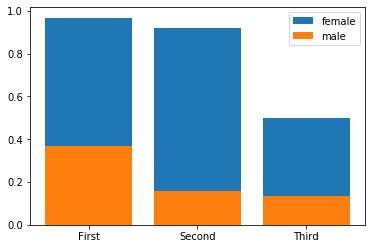

In [179]:
fig, ax = plt.subplots()
x = surv_by_class['class']
y1 = surv_by_class['female']
y2 = surv_by_class['male']
ax.bar(x, y1, label = 'female')
ax.bar(x, y2, label = 'male')
plt.legend(loc = 'upper right')

plt.show()

Сделали то же самое с помощью накопительной диаграммы и matplotlib.  На самом деле, интересно то, что в первом и втором классе спаслось примерно одинаковая процентная доля женщин.  Но во втором мужчин гораздо меньше, чем в первом.  

In [247]:
# Посчитаем распределение возраста пассажиров в классах (всех, не только спасшихся).

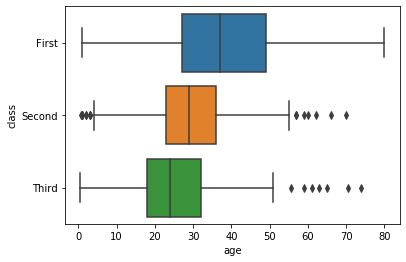

In [253]:
sns.boxplot(y="class", x="age", data=titanic, orient="h")

Классные данные.  Все как в жизни - люди помоложе едут в 3-м классе, но там есть и несколько человек достаточно пожилых.  Второй класс чуть постарше, но и разброс возрастов там шире. Первый класс с самым "широким" распределением и самым большим средним возрастом.  

Давайте посторим такой же график для спасшихся, хоть он и есть вверху в виде столбчатой диаграммы - повторим. 


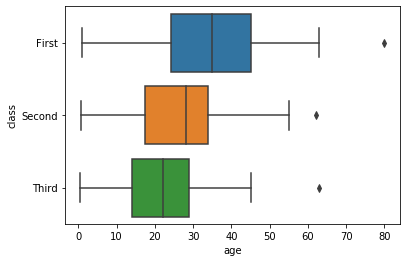

In [254]:
sns.boxplot(y="class", x="age", data=titanic.loc[titanic.survived == 1], orient="h")

Видно, что среди спасшихся только один пожилой человек смог спастись.  То же самое и в других классах - правые хвосты распределения спасщихся по возрасту обрезаны по сравнению с общим распределением.  К тому же распределение спасшихся во всех классах смещено влево, что означает, что у молодых людей было больше шансов спастись.